# $\fbox{4-4}$ 予測精度の評価 ~ AUC

## ROC 曲線と AUC

### 図形的定義

### ROC の描画と図形的理解


In [1]:
%matplotlib notebook

import gc
import math
import pickle

# 本書 4 章の関数群を含む自作ライブラリ
import mylibs.mylib4 as mylib4

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'

pd.options.display.max_rows = 6
pd.options.display.max_columns = 12

In [2]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
y_score = (np.arange(9) + 1) / 10  # [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y_actual = [0, 0, 1, 0, 1, 1, 0, 1, 1]
df1 = pd.DataFrame(y_score, columns=['score'])
df1['actual'] = y_actual
df1.index.name = 'i'

df1.T

i,0,1,2,3,4,5,6,7,8
score,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
actual,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


In [4]:
fpr, tpr, thresholds = roc_curve(y_actual, y_score)

print(fpr)
print(tpr)
print(thresholds)

[0.   0.   0.   0.25 0.25 0.5  0.5  1.  ]
[0.  0.2 0.4 0.4 0.8 0.8 1.  1. ]
[1.9 0.9 0.8 0.7 0.5 0.4 0.3 0.1]


<IPython.core.display.Javascript object>


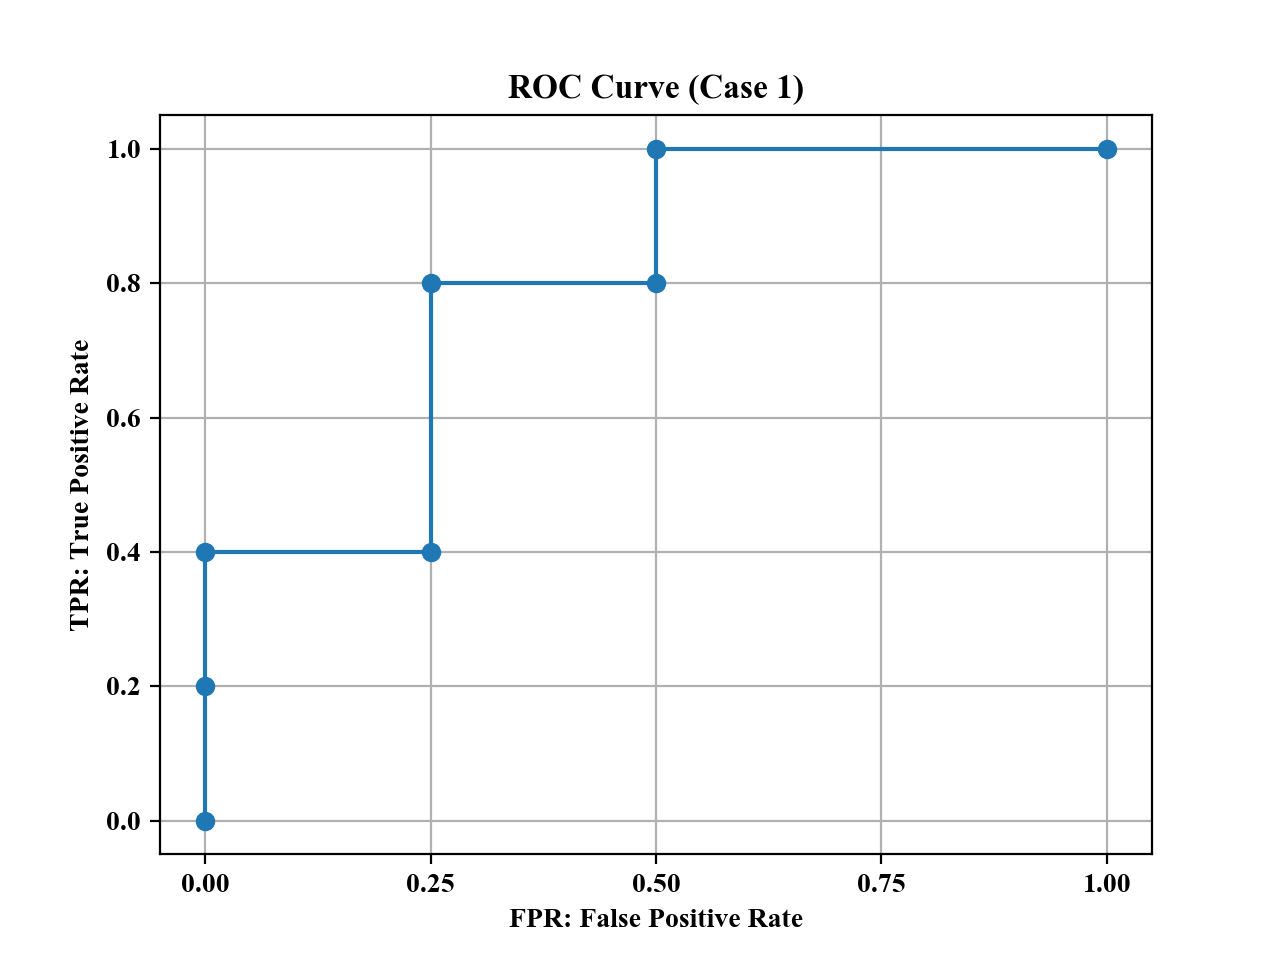

Text(0.5, 1.0, 'ROC Curve (Case 1)')

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(fpr, tpr, marker='o')
ax.set_xlabel('FPR: False Positive Rate')
ax.set_ylabel('TPR: True Positive Rate')
ax.set_xticks(np.arange(5) / 4)  # [0, 0.25, 0.5, 0.75, 1]
ax.set_yticks(np.arange(6) / 5)  # [0, 0.2, 0.4, 0.6, 0.8, 1]
ax.grid()
ax.set_title('ROC Curve (Case 1)')

In [6]:
roc_auc_score(y_actual, y_score)

0.8

In [7]:
y_score = [0.1, 0.2, 0.2, 0.4, 0.4, 0.4, 0.7, 0.7, 0.9]
y_actual = [0, 0, 1, 0, 1, 1, 0, 1, 1]
df2 = pd.DataFrame(y_score, columns=['score'])
df2['actual'] = y_actual
df2.index.name = 'i'

df2.T

i,0,1,2,3,4,5,6,7,8
score,0.1,0.2,0.2,0.4,0.4,0.4,0.7,0.7,0.9
actual,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


In [8]:
fpr, tpr, thresholds = roc_curve(y_actual, y_score)

print(fpr)
print(tpr)
print(thresholds)

[0.   0.   0.25 0.5  0.75 1.  ]
[0.  0.2 0.4 0.8 1.  1. ]
[1.9 0.9 0.7 0.4 0.2 0.1]


<IPython.core.display.Javascript object>


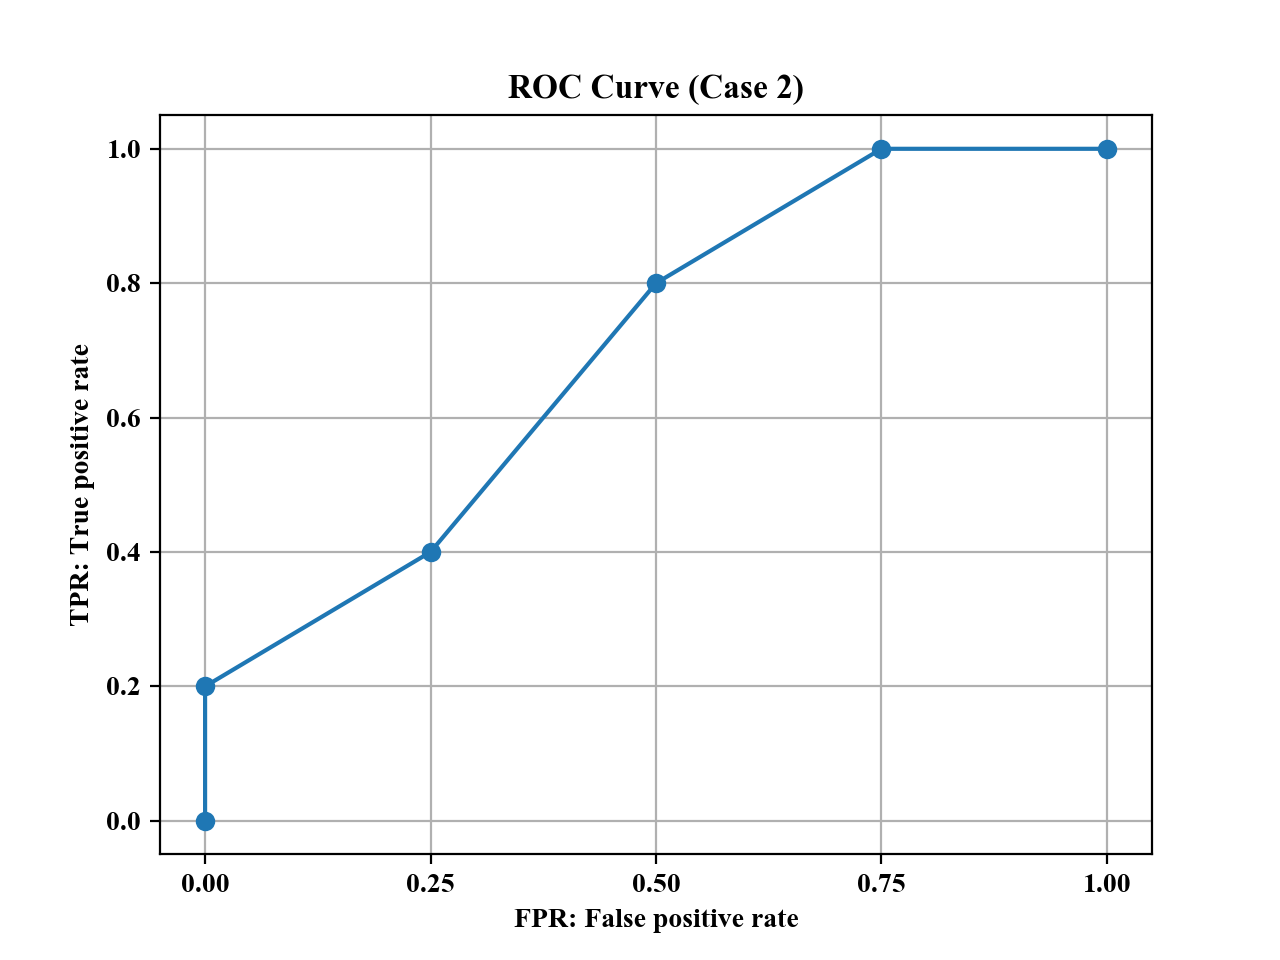

Text(0.5, 1.0, 'ROC Curve (Case 2)')

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(fpr, tpr, marker='o')
ax.set_xlabel('FPR: False positive rate')
ax.set_ylabel('TPR: True positive rate')
ax.set_xticks(np.arange(5) / 4)  # [0, 0.25, 0.5, 0.75, 1]
ax.set_yticks(np.arange(6) / 5)  # [0, 0.2, 0.4, 0.6, 0.8, 1]
ax.grid()
ax.set_title('ROC Curve (Case 2)')

In [10]:
roc_auc_score(y_actual, y_score)

0.7000000000000001

### AUC の数理的定義


### AUC の一般的な解釈基準


## AUC の計算


In [11]:
(dict_bp, opt_result, df_summary) = mylib4.load_bases()
w = opt_result.x[0]

In [12]:
sex, age = 'M', 60
rates_exp = mylib4.predict_rate(df_summary, dict_bp, w, 'exp', sex, age)
rates_out = mylib4.predict_rate(df_summary, dict_bp, w, 'out', sex, age)

rates_exp

array([0.01556406, 0.02171644, 0.02171644, ..., 0.03030083, 0.03030083,
       0.03030083])

In [13]:
rate_exp, count_exp = np.unique(rates_exp, return_counts=True)
rate_out, count_out = np.unique(rates_out, return_counts=True)

rate_exp, count_exp, rate_out, count_out

(array([0.0079945 , 0.01115467, 0.01556406, 0.02171644, 0.03030083,
        0.04227858]),
 array([144, 204, 419, 296, 160,  42]),
 array([0.0079945 , 0.01115467, 0.01556406, 0.02171644, 0.03030083]),
 array([ 1,  1, 10,  7,  4]))

In [14]:
def count_rates_exp_dif_out(rate_exp, count_exp, rate_out, count_out):
    for r in rate_out:
        count_exp[rate_exp == r] = (count_exp[rate_exp == r] - count_out[rate_out == r])
    return (rate_exp, count_exp)


# edo: Exposure Diff Outcome
(rate_edo, count_edo) = count_rates_exp_dif_out(rate_exp, count_exp, rate_out, count_out)

print(rate_edo)
print(count_edo)

[0.0079945  0.01115467 0.01556406 0.02171644 0.03030083 0.04227858]
[143 203 409 289 156  42]


In [15]:
def make_actual_and_score(df_summary, dict_bp, w, sex, age):
    rates_exp = mylib4.predict_rate(df_summary, dict_bp, w, 'exp', sex, age)
    rates_out = mylib4.predict_rate(df_summary, dict_bp, w, 'out', sex, age)
    rate_exp, count_exp = np.unique(rates_exp, return_counts=True)
    rate_out, count_out = np.unique(rates_out, return_counts=True)
    # edo: Exposure Diff Outcome
    (rate_edo, count_edo) = count_rates_exp_dif_out(rate_exp, count_exp, rate_out, count_out)
    y_actual = np.append(np.repeat(0, count_edo.sum()), np.repeat(1, count_out.sum()))
    y_score  = np.append(np.repeat(rate_edo, count_edo), np.repeat(rate_out, count_out))
    return (y_actual, y_score)


sex, age = 'M', 60
(y_actual, y_score) = make_actual_and_score(df_summary, dict_bp, w, sex, age)
roc_auc_score(y_actual, y_score)

0.5813029475600364

In [16]:
df_summary

,sex,age,out,exp,beta,rate,baseline,baseline_LCL,baseline_UCL
0,M,0.0,3.0,314.0,390.033267,0.009554,0.007692,0.007686,0.007697
1,M,1.0,1.0,677.0,860.863440,0.001477,0.001162,0.001156,0.001167
2,M,2.0,7.0,796.0,1011.510175,0.008794,0.006920,0.006915,0.006926
...,...,...,...,...,...,...,...,...,...
127,F,62.0,17.0,1448.0,2906.680608,0.011740,0.005849,0.005843,0.005854
128,F,63.0,21.0,1356.0,2839.252421,0.015487,0.007396,0.007391,0.007402
129,F,64.0,13.0,1243.0,2599.738200,0.010459,0.005001,0.004995,0.005006


In [17]:
df_summary['auc'] = None
for sex in ['M', 'F']:
    for age in np.arange(65):
        i = (sex == 'F') * 65 + age
        try:
            (y_actual, y_score) = make_actual_and_score(df_summary, dict_bp, w, sex, age)
            df_summary.loc[i, 'auc'] = roc_auc_score(y_actual, y_score)
        except:
            pass
        
df_summary

,sex,age,out,exp,beta,rate,baseline,baseline_LCL,baseline_UCL,auc
0,M,0.0,3.0,314.0,390.033267,0.009554,0.007692,0.007686,0.007697,0.653269
1,M,1.0,1.0,677.0,860.863440,0.001477,0.001162,0.001156,0.001167,0.906805
2,M,2.0,7.0,796.0,1011.510175,0.008794,0.006920,0.006915,0.006926,0.572968
...,...,...,...,...,...,...,...,...,...,...
127,F,62.0,17.0,1448.0,2906.680608,0.011740,0.005849,0.005843,0.005854,0.645969
128,F,63.0,21.0,1356.0,2839.252421,0.015487,0.007396,0.007391,0.007402,0.684947
129,F,64.0,13.0,1243.0,2599.738200,0.010459,0.005001,0.004995,0.005006,0.50541


<IPython.core.display.Javascript object>


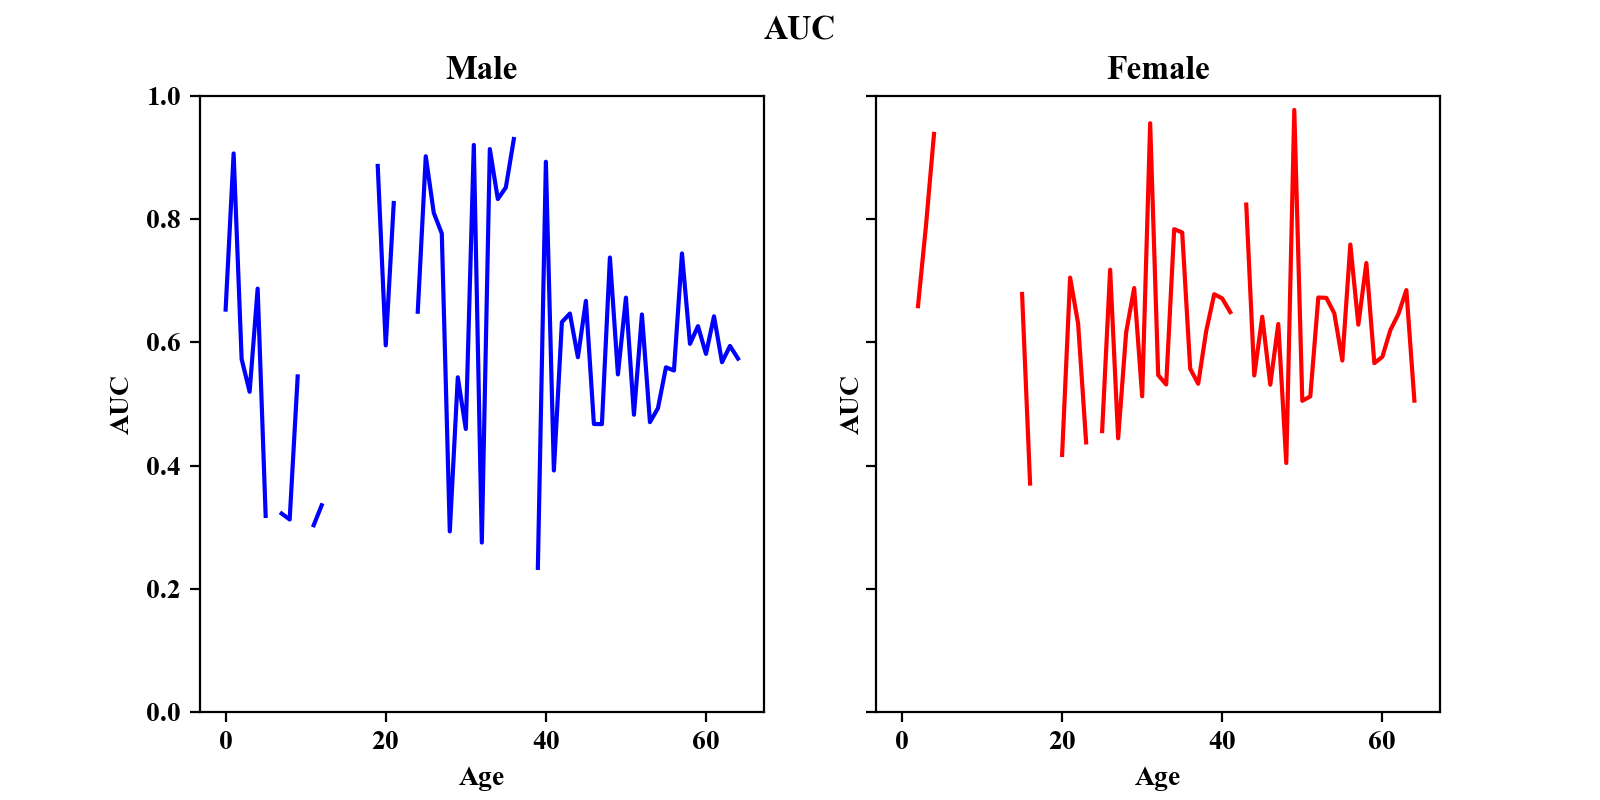

In [18]:
def plot_auc(ax, df, color, title):
    ax.plot(df['age'], df['auc'], c=color)
    ax.set_ylim([0, 1])
    ax.set_xlabel('Age')
    ax.set_ylabel('AUC')
    ax.set_title(title)
    return ax


fig = plt.figure(figsize=(8, 4))
fig.suptitle('AUC')
axes = fig.subplots(1, 2, sharex=True, sharey=True)
# 男性
ax = axes[0]
df = df_summary[df_summary['sex'] == 'M']
ax = plot_auc(ax, df, 'b', 'Male')
# 女性
ax = axes[1]
df = df_summary[df_summary['sex'] == 'F']
ax = plot_auc(ax, df, 'r', 'Female')

In [19]:
def make_whole_actual_and_score(df_summary, dict_bp, w):
    Y_actual, Y_score = [], []
    for sex in ['M', 'F']:
        for age in np.arange(65):
            i = (sex == 'F') * 65 + age
            (y_actual, y_score) = make_actual_and_score(df_summary, dict_bp, w, sex, age)
            try:
                Y_actual = np.append(Y_actual, y_actual)
                Y_score = np.append(Y_score, y_score)
            except:
                Y_actual = y_actual
                Y_score = y_score
    return (Y_actual, Y_score)
        
    
(Y_actual, Y_score) = make_whole_actual_and_score(df_summary, dict_bp, w)
roc_auc_score(Y_actual, Y_score)

0.8042008691686133

## 集団の統合による AUC の変化


### AUC が大きくなるケース


In [20]:
group = np.concatenate([np.ones(5), np.ones(5)*2]).astype('i1')
y_score = np.arange(10) / 10
y_actual = [0, 0, 0, 1, 0, 1, 0, 1, 1, 1]
df3 = pd.DataFrame(group, columns=['group'])
df3['score'] = y_score
df3['actual'] = y_actual
df3.index.name = 'i'

df3.T

i,0,1,2,3,4,5,6,7,8,9
group,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
actual,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0


### AUC が小さくなるケース


In [21]:
group = np.concatenate([np.ones(5), np.ones(5)*2]).astype('i1')
y_score = np.arange(10) / 10
y_actual = [1, 0, 1, 1, 1, 0, 0, 0, 1, 0]
df4 = pd.DataFrame(group, columns=['group'])
df4['score'] = y_score
df4['actual'] = y_actual
df4.index.name = 'i'

df4.T

i,0,1,2,3,4,5,6,7,8,9
group,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
actual,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


## まとめ